In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
wine = pd.read_csv('data/winequality-red.csv', sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


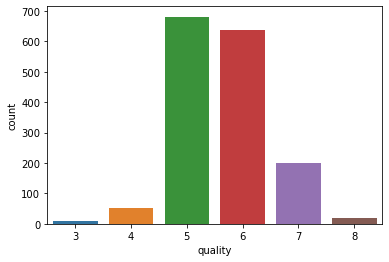

In [3]:
sns.countplot(x='quality', data=wine)

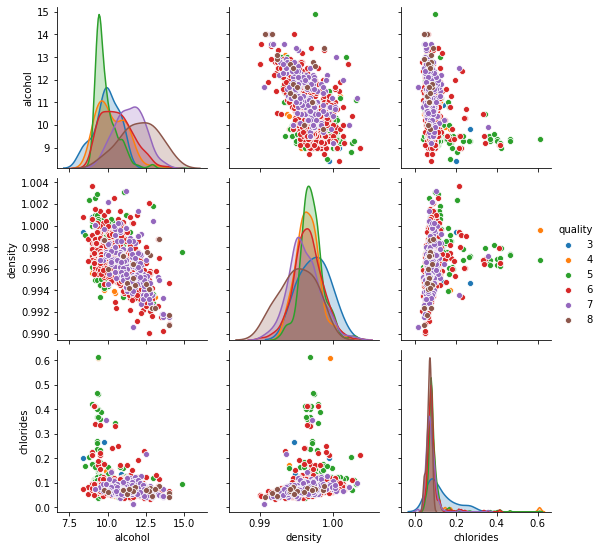

In [4]:
sns.pairplot(wine[['alcohol', 'density', 'chlorides', 'quality']], hue='quality')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = wine.drop('quality', axis=1)
y = wine['quality']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = lr.predict(X_test)
y_pred

array([4.41700867, 5.36619073, 6.14205014, 5.34363458, 5.3452536 ,
       5.26309679, 5.20617551, 5.64955392, 4.86666667, 5.26003754,
       5.09446475, 5.44235171, 6.3364698 , 6.35855094, 4.97231363,
       5.41912871, 5.17682863, 6.08472064, 5.45358052, 5.89703899,
       5.61686139, 6.93780843, 7.00231981, 5.4877441 , 5.05498024,
       5.19603922, 5.8305991 , 5.69508102, 5.8305991 , 5.61796013,
       4.73092443, 4.88683621, 5.17468703, 5.21936295, 5.52712356,
       5.64276933, 5.26601867, 5.67836687, 5.81735395, 4.80021176,
       5.74797577, 6.77992025, 5.56123792, 5.29708014, 5.40878928,
       5.26863249, 6.38700382, 5.79387683, 6.62389687, 5.66462561,
       5.60851653, 6.49052579, 5.52488827, 4.93322922, 6.05787341,
       5.15618678, 5.82119142, 5.66499381, 5.69026825, 5.80553632,
       5.80573127, 5.68022457, 6.13672477, 5.44848312, 6.30726775,
       5.0899705 , 5.57703322, 5.4136611 , 5.38890384, 5.50152556,
       5.88652876, 5.67314935, 4.70969409, 6.9705977 , 5.24439

In [12]:
lr.score(X_test, y_test)

0.32356259756383177

In [13]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.32356259756383177


In [15]:
lr.coef_

array([ 1.13846894e-02, -1.12745028e+00, -2.35105952e-01,  1.14679015e-02,
       -2.08803074e+00,  3.09018953e-03, -2.60897384e-03, -8.04704940e+00,
       -4.44101874e-01,  8.90429080e-01,  2.99657516e-01])

In [17]:
df_coff = pd.DataFrame(lr.coef_, index = X.columns, columns = ['Coefficient'])

In [18]:
df_coff

,Coefficient
fixed acidity,0.011385
volatile acidity,-1.127450
citric acid,-0.235106
residual sugar,0.011468
chlorides,-2.088031
free sulfur dioxide,0.003090
total sulfur dioxide,-0.002609
density,-8.047049
pH,-0.444102
sulphates,0.890429


In [19]:
from sklearn.datasets import load_boston

In [20]:
boston = load_boston()

In [21]:
X = boston.data
y = boston.target

In [31]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [32]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [25]:
lr1 = LinearRegression()

In [26]:
lr1.fit(X_train, y_train)

LinearRegression()

In [27]:
lr1.score(X_test, y_test)

0.7087445028578003

In [28]:
lr1.coef_

array([-1.33928204e-01,  3.54893779e-02, -1.49129034e-02,  3.01487099e+00,
       -1.81924993e+01,  3.55887380e+00,  2.10266781e-02, -1.40741077e+00,
        3.40516030e-01, -1.23940152e-02, -1.05229833e+00,  1.13914492e-02,
       -5.72647264e-01])

In [33]:
df_coeff = pd.DataFrame(lr1.coef_, index = boston.feature_names, columns = ['Coefficient'])
df_coeff

,Coefficient
CRIM,-0.133928
ZN,0.035489
INDUS,-0.014913
CHAS,3.014871
NOX,-18.192499
RM,3.558874
AGE,0.021027
DIS,-1.407411
RAD,0.340516
TAX,-0.012394


1 unit increase in CRIM is associated with decrease of 0.133928 in the wine quality

1 unit increase in NOX is associated with decrease of 18.192499 in the wine quality